In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import xgboost as xgb
import warnings
from time import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pdl; pdl.set_option("display.max_rows",50); pdl.set_option("display.max_columns",50)

In [4]:
tdc_file='data/tdc/tdc_2018.csv';tdc2018_df=pd.read_csv(tdc_file);print('Shape of tdc2018_df:',tdc2018_df.shape);tdc2018_df.head()

Shape of tdc2018_df: (2622, 5)


,tourney_id,match_num,match_played,correct_pick,countable_pick
0,2018-0301,271,1,1,1
1,2018-0301,272,1,1,1
2,2018-0301,273,1,0,1
3,2018-0301,275,1,1,1
4,2018-0301,276,1,1,1


In [16]:
import pandas as pd
tdc_2018_raw_df = pd.read_csv("data/tdc/tdc_2018.csv")  


In [17]:
print(tdc_2018_raw_df.isna().sum()) # type: ignore

tourney_id        0
match_num         0
match_played      0
correct_pick      0
countable_pick    0
dtype: int64


In [13]:
fname_atp='data/atp/atp_matches_2018.csv'; atp2018_df=pd.read_csv(fname_atp); print('Shape of atp2018_df:', atp2018_df.shape); atp2018_df.head()

Shape of atp2018_df: (2889, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-M020,Brisbane,Hard,NaN,A,20180101,271,105992,NaN,NaN,Ryan Harrison,R,183.0,USA,25.65,104919,NaN,NaN,Leonardo Mayer,R,188.0,ARG,30.63,6-4 3-6 6-2,3,R32,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
1,2018-M020,Brisbane,Hard,NaN,A,20180101,272,111577,NaN,NaN,Jared Donaldson,R,NaN,USA,21.23,111442,NaN,WC,Jordan Thompson,R,NaN,AUS,23.70,6-2 6-4,3,R32,90.0,5.0,3.0,58.0,32.0,25.0,14.0,9.0,4.0,5.0,3.0,5.0,62.0,41.0,25.0,7.0,9.0,7.0,11.0,54.0,890.0,94.0,593.0
2,2018-M020,Brisbane,Hard,NaN,A,20180101,273,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,31.32,106000,7.0,NaN,Damir Dzumhur,R,172.0,BIH,25.62,6-7(4) 6-3 6-2,3,R32,145.0,7.0,0.0,94.0,66.0,48.0,12.0,14.0,9.0,11.0,8.0,6.0,120.0,53.0,37.0,29.0,15.0,10.0,16.0,63.0,809.0,30.0,1391.0
3,2018-M020,Brisbane,Hard,NaN,A,20180101,275,200282,NaN,WC,Alex De Minaur,R,NaN,AUS,18.87,105449,NaN,NaN,Steve Johnson,R,188.0,USA,28.02,7-6(7) 6-4,3,R32,104.0,9.0,3.0,66.0,37.0,32.0,17.0,11.0,2.0,3.0,6.0,2.0,80.0,43.0,33.0,17.0,11.0,4.0,6.0,208.0,245.0,44.0,1055.0
4,2018-M020,Brisbane,Hard,NaN,A,20180101,276,111581,NaN,Q,Michael Mmoh,R,NaN,USA,19.98,105643,NaN,NaN,Federico Delbonis,L,190.0,ARG,27.24,6-3 6-4,3,R32,69.0,5.0,4.0,55.0,38.0,32.0,11.0,10.0,3.0,3.0,4.0,0.0,45.0,35.0,28.0,5.0,9.0,0.0,2.0,175.0,299.0,68.0,755.0


In [18]:
import pandas as pd
atp_2018_raw_df = pd.read_csv("data/atp/atp_matches_2018.csv")  

In [19]:
columns = ['tourney_id','match_num','winner_rank','loser_rank']
atp2018_df = atp_2018_raw_df[columns][~atp_2018_raw_df['tourney_level'].isin(['D','F'])] # type: ignore
print('Shape of atp2018_df:', atp2018_df.shape)
atp2018_df.head()


Shape of atp2018_df: (2622, 4)


,tourney_id,match_num,winner_rank,loser_rank
0,2018-M020,271,47.0,52.0
1,2018-M020,272,54.0,94.0
2,2018-M020,273,63.0,30.0
3,2018-M020,275,208.0,44.0
4,2018-M020,276,175.0,68.0


In [23]:
import pandas as pd
atp_2018_df = pd.read_csv("data/atp/atp_matches_2018.csv")  # Adjust path if needed


In [24]:
atp_2018_raw_df[(~atp_2018_raw_df['tourney_level'].isin(['D', 'F'])) & atp_2018_raw_df['loser_rank'].isna()]  # type: ignore

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
32,2018-0451,Doha,Hard,NaN,A,20180101,275,105882,NaN,Q,Stefano Travaglia,U,NaN,ITA,26.04,106325,NaN,WC,Jabor Al Mutawa,U,NaN,QAT,23.62,6-1 6-2,3,R32,53.0,8.0,2.0,34.0,20.0,19.0,9.0,7.0,0.0,0.0,0.0,2.0,50.0,40.0,19.0,3.0,8.0,4.0,9.0,134.0,414.0,NaN,NaN
91,2018-0301,Auckland,Hard,NaN,A,20180108,278,105138,5.0,NaN,Roberto Bautista Agut,R,183.0,ESP,29.74,105030,NaN,WC,Michael Venus,R,NaN,NZL,30.23,6-2 6-1,3,R32,56.0,3.0,1.0,51.0,37.0,29.0,7.0,8.0,5.0,6.0,3.0,3.0,42.0,18.0,11.0,4.0,7.0,2.0,7.0,21.0,1855.0,NaN,NaN
442,2018-7434,Sofia,Hard,NaN,A,20180205,283,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,31.41,202090,NaN,WC,Adrian Andreev,U,NaN,BUL,16.74,6-3 6-4,3,R32,78.0,3.0,0.0,56.0,36.0,27.0,9.0,10.0,1.0,4.0,1.0,3.0,58.0,39.0,18.0,10.0,9.0,4.0,9.0,74.0,713.0,NaN,NaN


In [25]:
filepath = 'data/atp/'
filenames = glob.glob(filepath + '*.csv')
li = []
for filename in filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df = pd.concat(li, axis=0, ignore_index=True)

In [26]:
print('Shape of df: {}'.format(df.shape))
df.head()

Shape of df: (176572, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-339,Adelaide,Hard,NaN,A,20000103,1,102358,1.0,NaN,Thomas Enqvist,R,190.0,SWE,25.81,103096,NaN,NaN,Arnaud Clement,R,173.0,FRA,22.05,6-3 6-4,3,R32,76.0,6.0,0.0,66.0,29.0,23.0,23.0,10.0,2.0,2.0,1.0,3.0,59.0,37.0,25.0,13.0,9.0,2.0,4.0,4.0,1850.0,56.0,490.0
1,2000-339,Adelaide,Hard,NaN,A,20000103,2,103819,NaN,NaN,Roger Federer,R,185.0,SUI,18.40,102533,NaN,NaN,Jens Knippschild,R,190.0,GER,24.88,6-1 6-4,3,R32,45.0,6.0,3.0,46.0,28.0,24.0,12.0,9.0,0.0,0.0,3.0,5.0,42.0,15.0,13.0,12.0,8.0,0.0,3.0,64.0,515.0,91.0,404.0
2,2000-339,Adelaide,Hard,NaN,A,20000103,3,102998,NaN,NaN,Jan Michael Gambill,R,190.0,USA,22.58,101885,NaN,NaN,Wayne Arthurs,L,190.0,AUS,28.80,3-6 7-6(5) 6-4,3,R32,115.0,8.0,3.0,81.0,40.0,35.0,28.0,15.0,0.0,1.0,26.0,2.0,103.0,59.0,49.0,22.0,16.0,4.0,5.0,58.0,544.0,105.0,243.0
3,2000-339,Adelaide,Hard,NaN,A,20000103,4,103206,7.0,NaN,Sebastien Grosjean,R,175.0,FRA,21.60,102776,NaN,NaN,Andrew Ilie,R,180.0,AUS,23.71,6-2 6-1,3,R32,65.0,4.0,2.0,66.0,35.0,28.0,14.0,7.0,4.0,4.0,0.0,3.0,49.0,22.0,12.0,8.0,8.0,1.0,6.0,27.0,928.0,54.0,602.0
4,2000-339,Adelaide,Hard,NaN,A,20000103,5,102796,3.0,NaN,Magnus Norman,R,188.0,SWE,23.59,102401,NaN,WC,Scott Draper,L,178.0,AUS,25.58,6-4 6-4,3,R32,68.0,6.0,2.0,52.0,32.0,26.0,12.0,10.0,0.0,1.0,4.0,2.0,73.0,40.0,25.0,16.0,10.0,7.0,10.0,15.0,1244.0,154.0,219.0


In [27]:

df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,0.0,1.765720e+05,176572.000000,176572.000000,75164.000000,132525.000000,176542.000000,176572.000000,41381.000000,115595.000000,176185.000000,176572.000000,112954.000000,117081.000000,117081.000000,117081.00000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,117081.000000,175117.000000,175117.000000,170789.000000,170789.000000
mean,NaN,2.009890e+07,137.569603,105835.891970,5.636741,184.896065,25.593767,106740.809981,6.430101,184.676162,25.356508,3.158632,98.597323,5.822414,2.614147,72.71372,44.611833,33.389278,15.514900,11.604872,3.342336,4.912548,4.271786,3.405096,75.550405,45.117372,29.497963,13.793997,11.427772,4.589242,8.452353,197.755381,690.971990,269.024925,447.837308
std,NaN,5.429129e+04,218.156142,8992.519225,5.086880,6.744445,3.836250,11851.891922,5.474779,6.662957,3.997997,0.540464,39.902990,4.987832,2.229551,26.06097,16.905193,11.905547,6.384606,3.680256,2.955902,3.870466,4.221294,2.475962,25.786734,17.070361,12.855240,6.669343,3.686145,3.111074,3.827974,200.792903,1294.134856,288.477736,717.630473
min,NaN,2.000010e+07,1.000000,100415.000000,1.000000,145.000000,14.800000,100415.000000,1.000000,145.000000,14.080000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,2.005111e+07,12.000000,103580.000000,2.000000,180.000000,22.730000,103581.000000,3.000000,180.000000,22.420000,3.000000,72.000000,2.000000,1.000000,54.00000,32.000000,25.000000,11.000000,9.000000,1.000000,2.000000,1.000000,2.000000,57.000000,33.000000,20.000000,9.000000,9.000000,2.000000,6.000000,73.000000,168.000000,94.000000,122.000000
50%,NaN,2.010063e+07,24.000000,104386.000000,5.000000,185.000000,25.380000,104474.000000,5.000000,185.000000,25.160000,3.000000,92.000000,5.000000,2.000000,68.00000,42.000000,31.000000,15.000000,11.000000,3.000000,4.000000,3.000000,3.000000,71.000000,42.000000,28.000000,13.000000,10.000000,4.000000,8.000000,150.000000,331.000000,189.000000,247.000000
75%,NaN,2.015031e+07,247.000000,105226.000000,7.000000,188.000000,28.170000,105438.000000,8.000000,188.000000,28.030000,3.000000,120.000000,8.000000,4.000000,89.00000,54.000000,40.000000,19.000000,14.000000,5.000000,7.000000,6.000000,5.000000,91.000000,55.000000,37.000000,18.000000,14.000000,6.000000,11.000000,255.000000,650.000000,321.000000,524.000000
max,NaN,2.018112e+07,946.000000,208279.000000,35.000000,208.000000,58.360000,208279.000000,35.000000,208.000000,60.170000,5.000000,4756.000000,412.000000,23.000000,491.00000,361.000000,292.000000,82.000000,90.000000,24.000000,30.000000,103.000000,25.000000,489.000000,328.000000,284.000000,101.000000,91.000000,25.000000,34.000000,2220.000000,16950.000000,2257.000000,16950.000000


In [28]:
df.groupby('surface').size()

surface
Carpet     6120
Clay      72289
Grass     10373
Hard      87592
dtype: int64

In [29]:
df[df['surface'] == 'None'].groupby('tourney_name', as_index=False).size().head()

,tourney_name,size


In [30]:
df.groupby('tourney_level').size()

tourney_level
A    43601
C    99088
D     5888
F      271
G    14580
M    13144
dtype: int64

In [31]:
df[df['tourney_level'] == 'M'].groupby('tourney_name').size()

tourney_name
Canada Masters          1322
Cincinnati Masters      1335
Hamburg Masters          593
Indian Wells Masters    2037
Madrid Masters          1104
Miami Masters           2201
Monte Carlo Masters     1335
Paris Masters           1073
Rome Masters            1311
Shanghai Masters         739
Stuttgart Masters         94
dtype: int64

In [32]:
df.groupby('round').size()

round
BR          7
F        4151
Q1      15753
Q2       9359
Q3       3790
QF      16431
R128     5952
R16     32828
R32     64499
R64      9008
RR       6530
SF       8264
dtype: int64

In [33]:
df[df['round'] == 'BR'].groupby('tourney_name', as_index=False).size().head(7)

,tourney_name,size
0,Athens Olympics,1
1,Beijing Olympics,1
2,London Olympics,1
3,Next Gen Finals,2
4,Rio Olympics,1
5,Sydney Olympics,1


In [ ]:

df[df['tourney_name'].isin(['Aix En Provence CH', 'Aix en Provence CH'])].groupby(['tourney_name', 'tourney_id']).size()

tourney_name        tourney_id
Aix En Provence CH  2003-1685     31
                    2004-1685     31
                    2017-7009     54
                    2018-7009     56
Aix en Provence CH  2014-7009     31
                    2015-7009     31
                    2016-7009     49
dtype: int64

In [35]:

tdc_2018_df = tdc_2018_raw_df[['tourney_id', 'match_num']][tdc_2018_raw_df['countable_pick'] == 1] # type: ignore
print('Shape of tdc_2018_df: {}'.format(tdc_2018_df.shape))
tdc_2018_df.head()

Shape of tdc_2018_df: (1758, 2)


,tourney_id,match_num
0,2018-0301,271
1,2018-0301,272
2,2018-0301,273
3,2018-0301,275
4,2018-0301,276


In [36]:

atp_2018_df['loser_rank'].fillna(2000, inplace=True) # type: ignore
print(atp_2018_df.isna().sum()) # type: ignore

tourney_id               0
tourney_name             0
surface                  0
draw_size             2889
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1749
winner_entry          2495
winner_name              0
winner_hand              4
winner_ht              980
winner_ioc               0
winner_age               0
loser_id                 0
loser_seed            2178
loser_entry           2299
loser_name               0
loser_hand              11
loser_ht              1160
loser_ioc                0
loser_age                3
score                    0
best_of                  0
round                    0
minutes                 35
w_ace                   26
w_df                    26
w_svpt                  26
w_1stIn                 26
w_1stWon                26
w_2ndWon                26
w_SvGms                 26
w_bpSaved               26
w_bpFaced               26
l_ace                   26
l

C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\1485527176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  atp_2018_df['loser_rank'].fillna(2000, inplace=True) # type: ignore


In [37]:

atp_2018_df = pd.merge(atp_2018_df, tdc_2018_df, how='inner', on=['tourney_id', 'match_num']) # type: ignore
print('Shape of atp_2018_df: {}'.format(atp_2018_df.shape))
atp_2018_df.head()

Shape of atp_2018_df: (1758, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2018-M020,Brisbane,Hard,NaN,A,20180101,271,105992,NaN,NaN,Ryan Harrison,R,183.0,USA,25.65,104919,NaN,NaN,Leonardo Mayer,R,188.0,ARG,30.63,6-4 3-6 6-2,3,R32,123.0,9.0,2.0,82.0,49.0,39.0,20.0,13.0,8.0,9.0,10.0,3.0,80.0,47.0,33.0,19.0,14.0,1.0,4.0,47.0,1010.0,52.0,909.0
1,2018-M020,Brisbane,Hard,NaN,A,20180101,272,111577,NaN,NaN,Jared Donaldson,R,NaN,USA,21.23,111442,NaN,WC,Jordan Thompson,R,NaN,AUS,23.70,6-2 6-4,3,R32,90.0,5.0,3.0,58.0,32.0,25.0,14.0,9.0,4.0,5.0,3.0,5.0,62.0,41.0,25.0,7.0,9.0,7.0,11.0,54.0,890.0,94.0,593.0
2,2018-M020,Brisbane,Hard,NaN,A,20180101,273,104797,NaN,NaN,Denis Istomin,R,188.0,UZB,31.32,106000,7.0,NaN,Damir Dzumhur,R,172.0,BIH,25.62,6-7(4) 6-3 6-2,3,R32,145.0,7.0,0.0,94.0,66.0,48.0,12.0,14.0,9.0,11.0,8.0,6.0,120.0,53.0,37.0,29.0,15.0,10.0,16.0,63.0,809.0,30.0,1391.0
3,2018-M020,Brisbane,Hard,NaN,A,20180101,275,200282,NaN,WC,Alex De Minaur,R,NaN,AUS,18.87,105449,NaN,NaN,Steve Johnson,R,188.0,USA,28.02,7-6(7) 6-4,3,R32,104.0,9.0,3.0,66.0,37.0,32.0,17.0,11.0,2.0,3.0,6.0,2.0,80.0,43.0,33.0,17.0,11.0,4.0,6.0,208.0,245.0,44.0,1055.0
4,2018-M020,Brisbane,Hard,NaN,A,20180101,276,111581,NaN,Q,Michael Mmoh,R,NaN,USA,19.98,105643,NaN,NaN,Federico Delbonis,L,190.0,ARG,27.24,6-3 6-4,3,R32,69.0,5.0,4.0,55.0,38.0,32.0,11.0,10.0,3.0,3.0,4.0,0.0,45.0,35.0,28.0,5.0,9.0,0.0,2.0,175.0,299.0,68.0,755.0


In [38]:

main_df = df[~df['tourney_level'].isin(['D', 'F'])]
main_df = main_df[~main_df['tourney_id'].isin(['2008-96', '2012-96', '2016-O16', '2017-7696'])]
main_df = main_df[~main_df['tourney_id'].str.split(pat='-').str.get(1).isin(['6406', '0605', '615', '433', '506', '499', '339', '96'])] 
print('Shape of main_df: {}'.format(main_df.shape))

Shape of main_df: (167244, 49)


In [39]:

main_df['tourney_id_per'] = main_df['tourney_id'].str.split(pat='-').str.get(1)
main_df.groupby('tourney_id_per').size().head()

tourney_id_per
0083    167
0091    169
0213    151
0221    154
0228    160
dtype: int64

In [40]:

main_df['tourney_year'] = main_df['tourney_id'].str.split(pat='-').str.get(0).astype(int)
main_df.groupby('tourney_year').size()

tourney_year
2000     6606
2001     7009
2002     6433
2003     6907
2004     7264
2005     7420
2006     7761
2007     9674
2008     9651
2009     9348
2010     9090
2011     8839
2012     8826
2013     8892
2014     8847
2015     9227
2016    12457
2017    10451
2018    12542
dtype: int64

In [41]:

round_dict = {'Q1': 1,
              'Q2': 2,
              'Q3': 3,
              'R128': 4,
              'R64': 5,
              'R32': 6,
              'R16': 7,
              'QF': 8,
              'SF': 9,
              'F': 10} 
main_df['round'].replace(round_dict, inplace=True)
main_df.groupby('round').size()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\3401263097.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['round'].replace(round_dict, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\3401263097.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_df['round'].repl

round
1     15344
2      9143
3      3690
4      5952
5      8848
6     63571
7     32372
8     16187
9      8092
10     4045
dtype: int64

In [42]:

main_df[main_df['round'] == 10].head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,...,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_id_per,tourney_year
61,2000-891,Chennai,Hard,NaN,A,20000103,31,102259,4.0,NaN,Jerome Golmard,L,188.0,FRA,26.32,103082,NaN,NaN,Markus Hantschk,R,188.0,GER,22.12,6-3 6-7(6) 6-3,3,...,148.0,8.0,1.0,88.0,65.0,49.0,13.0,14.0,2.0,3.0,10.0,4.0,123.0,74.0,53.0,18.0,16.0,9.0,14.0,35.0,666.0,128.0,273.0,891,2000
92,2000-451,Doha,Hard,NaN,A,20000103,31,102148,3.0,NaN,Fabrice Santoro,R,178.0,FRA,27.07,102783,NaN,NaN,Rainer Schuettler,R,180.0,GER,23.69,3-6 7-5 3-0 RET,3,...,118.0,3.0,0.0,74.0,44.0,27.0,16.0,12.0,2.0,6.0,1.0,1.0,85.0,61.0,33.0,12.0,13.0,7.0,12.0,34.0,764.0,48.0,579.0,451,2000
123,2000-301,Auckland,Hard,NaN,A,20000110,31,102796,2.0,NaN,Magnus Norman,R,188.0,SWE,23.61,102021,NaN,NaN,Michael Chang,R,175.0,USA,27.88,3-6 6-3 7-5,3,...,140.0,6.0,8.0,87.0,50.0,41.0,12.0,15.0,3.0,7.0,3.0,4.0,102.0,54.0,38.0,18.0,15.0,5.0,10.0,14.0,1498.0,50.0,722.0,301,2000
154,2000-338,Sydney,Hard,NaN,A,20000110,31,103720,NaN,NaN,Lleyton Hewitt,R,180.0,AUS,18.87,101727,NaN,WC,Jason Stoltenberg,R,185.0,AUS,29.77,6-4 6-0,3,...,57.0,2.0,4.0,41.0,29.0,25.0,5.0,8.0,0.0,1.0,2.0,3.0,46.0,21.0,13.0,8.0,8.0,1.0,6.0,21.0,1232.0,94.0,419.0,338,2000
281,2000-580,Australian Open,Hard,NaN,G,20000117,127,101736,1.0,NaN,Andre Agassi,R,180.0,USA,29.72,102338,2.0,NaN,Yevgeny Kafelnikov,R,190.0,RUS,25.91,3-6 6-3 6-2 6-4,5,...,139.0,9.0,5.0,116.0,77.0,52.0,23.0,18.0,4.0,7.0,14.0,9.0,122.0,65.0,42.0,30.0,18.0,11.0,17.0,1.0,4135.0,2.0,2915.0,580,2000


In [43]:

main_df['hth_id'] = np.where(main_df['winner_id'] < main_df['loser_id'], 
                          main_df['winner_id'].map(str) + '_' + main_df['loser_id'].map(str), 
                          main_df['loser_id'].map(str) + '_' + main_df['winner_id'].map(str))
main_df['hth_id_match'] = main_df['winner_id'].map(str) + '_' + main_df['loser_id'].map(str)
main_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,...,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_id_per,tourney_year,hth_id,hth_id_match
31,2000-891,Chennai,Hard,NaN,A,20000103,1,103420,NaN,NaN,Michal Tabara,R,175.0,CZE,20.40,102338,1.0,NaN,Yevgeny Kafelnikov,R,190.0,RUS,25.87,6-4 6-2,3,...,1.0,57.0,37.0,25.0,12.0,9.0,2.0,3.0,4.0,5.0,57.0,23.0,16.0,13.0,9.0,3.0,7.0,123.0,339.0,2.0,2733.0,891,2000,102338_103420,103420_102338
32,2000-891,Chennai,Hard,NaN,A,20000103,2,102455,NaN,NaN,Lorenzo Manta,R,190.0,SUI,25.30,102720,NaN,NaN,Tomas Zib,R,178.0,CZE,23.92,7-5 6-2,3,...,1.0,69.0,42.0,31.0,16.0,10.0,4.0,4.0,4.0,2.0,70.0,50.0,31.0,9.0,10.0,5.0,8.0,115.0,230.0,111.0,323.0,891,2000,102455_102720,102455_102720
33,2000-891,Chennai,Hard,NaN,A,20000103,3,102093,NaN,NaN,Martin Damm,R,188.0,CZE,27.42,103294,NaN,NaN,Christophe Rochus,R,170.0,BEL,21.05,6-3 6-0,3,...,0.0,46.0,26.0,23.0,12.0,8.0,1.0,1.0,1.0,1.0,37.0,17.0,8.0,9.0,7.0,1.0,5.0,104.0,296.0,121.0,293.0,891,2000,102093_103294,102093_103294
34,2000-891,Chennai,Hard,NaN,A,20000103,4,101086,7.0,NaN,Ronald Agenor,R,180.0,USA,35.14,104156,NaN,WC,Sunil Kumar,R,NaN,IND,16.75,6-4 6-4,3,...,0.0,64.0,35.0,26.0,19.0,10.0,2.0,3.0,2.0,3.0,62.0,32.0,22.0,16.0,10.0,1.0,4.0,96.0,416.0,1199.0,3.0,891,2000,101086_104156,101086_104156
35,2000-891,Chennai,Hard,NaN,A,20000103,5,102259,4.0,NaN,Jerome Golmard,L,188.0,FRA,26.32,102689,NaN,Q,Martin Spottl,R,180.0,AUT,24.11,6-3 6-4,3,...,2.0,65.0,43.0,33.0,14.0,10.0,4.0,4.0,6.0,2.0,61.0,21.0,14.0,23.0,9.0,2.0,4.0,35.0,666.0,201.0,191.0,891,2000,102259_102689,102259_102689


In [44]:

main_df = main_df[['tourney_id', 'tourney_id_per', 'tourney_year', 'tourney_date', 'match_num', 'surface', 'tourney_level', 
                   'round', 'hth_id', 'hth_id_match', 'winner_id', 'loser_id', 'winner_rank', 'loser_rank', 'winner_age', 
                   'loser_age', 'winner_ht', 'loser_ht']].copy()
print('Shape of main_df: {}'.format(main_df.shape))
main_df.head()

Shape of main_df: (167244, 18)


,tourney_id,tourney_id_per,tourney_year,tourney_date,match_num,surface,tourney_level,round,hth_id,hth_id_match,winner_id,loser_id,winner_rank,loser_rank,winner_age,loser_age,winner_ht,loser_ht
31,2000-891,891,2000,20000103,1,Hard,A,6,102338_103420,103420_102338,103420,102338,123.0,2.0,20.40,25.87,175.0,190.0
32,2000-891,891,2000,20000103,2,Hard,A,6,102455_102720,102455_102720,102455,102720,115.0,111.0,25.30,23.92,190.0,178.0
33,2000-891,891,2000,20000103,3,Hard,A,6,102093_103294,102093_103294,102093,103294,104.0,121.0,27.42,21.05,188.0,170.0
34,2000-891,891,2000,20000103,4,Hard,A,6,101086_104156,101086_104156,101086,104156,96.0,1199.0,35.14,16.75,180.0,NaN
35,2000-891,891,2000,20000103,5,Hard,A,6,102259_102689,102259_102689,102259,102689,35.0,201.0,26.32,24.11,188.0,180.0


In [45]:

main_df.isna().sum()

tourney_id            0
tourney_id_per        0
tourney_year          0
tourney_date          0
match_num             0
surface               0
tourney_level         0
round                 0
hth_id                0
hth_id_match          0
winner_id             0
loser_id              0
winner_rank         975
loser_rank         4616
winner_age           16
loser_age           357
winner_ht         41651
loser_ht          57345
dtype: int64

In [46]:

main_df[['winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht']].describe()

,winner_rank,loser_rank,winner_age,loser_age,winner_ht,loser_ht
count,166269.000000,162628.000000,167228.000000,166887.000000,125593.000000,109899.000000
mean,196.461493,266.494736,25.617185,25.380814,184.884898,184.670761
std,194.200318,282.714651,3.835924,3.991425,6.739884,6.659823
min,1.000000,1.000000,14.800000,14.080000,145.000000,145.000000
25%,76.000000,97.000000,22.750000,22.440000,180.000000,180.000000
50%,151.000000,190.000000,25.400000,25.180000,185.000000,185.000000
75%,255.000000,318.000000,28.190000,28.040000,188.000000,188.000000
max,2220.000000,2257.000000,58.360000,60.170000,208.000000,208.000000


In [47]:

main_df['winner_rank'].fillna(2000, inplace=True)
main_df['loser_rank'].fillna(2000, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\3518189319.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['winner_rank'].fillna(2000, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\3518189319.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [48]:

main_df['winner_age'].fillna(15, inplace=True)
main_df['loser_age'].fillna(15, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\1240007305.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['winner_age'].fillna(15, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\1240007305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [49]:

main_df['winner_ht'].fillna(main_df['winner_ht'].mean(), inplace=True)
main_df['loser_ht'].fillna(main_df['loser_ht'].mean(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\3558030799.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df['winner_ht'].fillna(main_df['winner_ht'].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\3558030799.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [50]:

main_df.isna().sum().sum()

np.int64(0)

In [51]:
hth_df=main_df[['hth_id','hth_id_match','tourney_id','tourney_date','match_num']].copy()
hth_df.sort_values(['hth_id','tourney_date','match_num'],ascending=[True,True,True],inplace=True)
hth_df['p1_win']=np.where(hth_df['hth_id']==hth_df['hth_id_match'],1,0)
hth_df['p2_win']=np.where(hth_df['hth_id']!=hth_df['hth_id_match'],1,0)
hth_df['p1_win_cum']=hth_df.groupby('hth_id')['p1_win'].cumsum()-hth_df['p1_win']
hth_df['p2_win_cum']=hth_df.groupby('hth_id')['p2_win'].cumsum()-hth_df['p2_win']
hth_df['p1_win_cum_5']=hth_df.groupby('hth_id')['p1_win'].rolling(window=6,min_periods=1).sum().reset_index(level=0,drop=True)-hth_df['p1_win']
hth_df['p2_win_cum_5']=hth_df.groupby('hth_id')['p2_win'].rolling(window=6,min_periods=1).sum().reset_index(level=0,drop=True)-hth_df['p2_win']
hth_df['hth_rate']=np.where(hth_df['hth_id']==hth_df['hth_id_match'],hth_df['p1_win_cum']-hth_df['p2_win_cum'],hth_df['p2_win_cum']-hth_df['p1_win_cum']).astype(float)
hth_df['hth_rate_5']=np.where(hth_df['hth_id']==hth_df['hth_id_match'],hth_df['p1_win_cum_5']-hth_df['p2_win_cum_5'],hth_df['p2_win_cum_5']-hth_df['p1_win_cum_5'])
print('Shape of hth_df:',hth_df.shape)
hth_df[hth_df['hth_id'].isin(['100644_103908','100644_103819','104792_104925'])].head(5)


Shape of hth_df: (167244, 13)


,hth_id,hth_id_match,tourney_id,tourney_date,match_num,p1_win,p2_win,p1_win_cum,p2_win_cum,p1_win_cum_5,p2_win_cum_5,hth_rate,hth_rate_5
51340,100644_103819,103819_100644,2016-M009,20160509,281,0,1,0,0,0.0,0.0,0.0,0.0
51624,100644_103819,100644_103819,2016-0500,20160613,299,1,0,0,1,0.0,1.0,-1.0,-1.0
54640,100644_103819,103819_100644,2017-0500,20170619,300,0,1,1,1,1.0,1.0,0.0,0.0
55174,100644_103819,100644_103819,2017-0421,20170807,300,1,0,1,2,1.0,2.0,-1.0,-1.0
139134,100644_103908,100644_103908,2014-526,20140630,31,1,0,0,0,0.0,0.0,0.0,0.0


In [52]:
hth_df.drop(['hth_id','hth_id_match','tourney_date','p1_win','p2_win','p1_win_cum','p2_win_cum','p1_win_cum_5','p2_win_cum_5'],axis=1,inplace=True)
hth_df.describe()


,match_num,hth_rate,hth_rate_5
count,167244.000000,167244.000000,167244.000000
mean,140.895811,0.099292,0.088404
std,218.573234,1.033475,0.890829
min,1.000000,-17.000000,-5.000000
25%,13.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000
75%,249.000000,0.000000,0.000000
max,946.000000,17.000000,5.000000


In [53]:
round_w_df=main_df.groupby(['winner_id','tourney_id_per','tourney_id','tourney_level'],as_index=False)['round'].max()
round_w_df.rename(columns={'winner_id':'player_id'},inplace=True)
round_w_df['round']=np.where(round_w_df['round']==10,11,round_w_df['round'])
round_l_df=main_df.groupby(['loser_id','tourney_id_per','tourney_id','tourney_level'],as_index=False)['round'].max()
round_l_df.rename(columns={'loser_id':'player_id'},inplace=True)
round_df=pd.concat([round_w_df,round_l_df],ignore_index=True,sort=True)
round_df=round_df.groupby(['player_id','tourney_id_per','tourney_id','tourney_level'],as_index=False)['round'].max()
columns=['player_id','tourney_id_per','tourney_id','tourney_level','round']
round_df=round_df[columns]
round_df.sort_values(['player_id','tourney_id'],ascending=[True,True],inplace=True)
round_df['round_sum_level']=round_df.groupby(['player_id','tourney_level'])['round'].cumsum()-round_df['round']
round_df['round_count_level']=round_df.groupby(['player_id','tourney_level'])['round'].cumcount()
round_df['round_avg_level']=round_df['round_sum_level']/round_df['round_count_level']
round_df['round_avg_level'].fillna(0,inplace=True)
round_df['round_sum_tid']=round_df.groupby(['player_id','tourney_id_per'])['round'].cumsum()-round_df['round']
round_df['round_count_tid']=round_df.groupby(['player_id','tourney_id_per'])['round'].cumcount()
round_df['round_avg_tid']=round_df['round_sum_tid']/round_df['round_count_tid']
round_df['round_avg_tid'].fillna(round_df['round_avg_level'],inplace=True)
print('Shape of round_df:',round_df.shape)
round_df[round_df['player_id'].isin([126205])].head(5)


Shape of round_df: (170448, 11)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\691652610.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  round_df['round_avg_level'].fillna(0,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\691652610.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,player_id,tourney_id_per,tourney_id,tourney_level,round,round_sum_level,round_count_level,round_avg_level,round_sum_tid,round_count_tid,round_avg_tid
164712,126205,3351,2015-3351,C,7,0,0,0.0,0,0,0.0
164715,126205,363,2015-363,C,6,7,1,7.0,0,0,7.0
164718,126205,422,2015-422,M,1,0,0,0.0,0,0,0.0
164720,126205,5067,2015-5067,C,7,13,2,6.5,0,0,6.5
164727,126205,560,2015-560,G,4,0,0,0.0,0,0,0.0


Finally we drop unnecessary columns and check that round is between 0 and 11 and that no NaN values exist.

In [54]:
round_df.drop(['tourney_id_per','tourney_level','round','round_sum_level','round_count_level','round_sum_tid','round_count_tid'],axis=1,inplace=True)
round_df.describe()


,player_id,round_avg_level,round_avg_tid
count,170448.000000,170448.000000,170448.000000
mean,106716.876842,5.686320,5.730741
std,11831.089940,2.113612,2.264467
min,100415.000000,0.000000,0.000000
25%,103581.000000,5.083333,5.000000
50%,104471.000000,6.514286,6.428571
75%,105426.000000,7.017897,7.000000
max,208279.000000,11.000000,11.000000


In [55]:
win_df=main_df[['winner_id','tourney_date','tourney_id','match_num','surface','tourney_level']].copy()
win_df.rename(columns={'winner_id':'player_id'},inplace=True)
win_df['win']=1
loss_df=main_df[['loser_id','tourney_date','tourney_id','match_num','surface','tourney_level']].copy()
loss_df.rename(columns={'loser_id':'player_id'},inplace=True)
loss_df['loss']=1
winrate_df=pd.concat([win_df,loss_df],ignore_index=True,sort=True)
columns=['player_id','tourney_date','tourney_id','match_num','surface','tourney_level','win','loss']
winrate_df=winrate_df[columns]
winrate_df.fillna(0,inplace=True)
winrate_df.sort_values(['player_id','tourney_date','tourney_id','match_num'],ascending=[True,True,True,True],inplace=True)
winrate_df['win_cum']=winrate_df.groupby('player_id')['win'].cumsum(axis=0)-winrate_df['win']
winrate_df['loss_cum']=winrate_df.groupby('player_id')['loss'].cumsum(axis=0)-winrate_df['loss']
winrate_df['win_cum_10']=winrate_df.groupby('player_id')['win'].rolling(window=11,min_periods=1).sum().reset_index(level=0,drop=True)-winrate_df['win']
winrate_df['loss_cum_10']=winrate_df.groupby('player_id')['loss'].rolling(window=11,min_periods=1).sum().reset_index(level=0,drop=True)-winrate_df['loss']
winrate_df['win_cum_surf']=winrate_df.groupby(['player_id','surface'])['win'].cumsum(axis=0)-winrate_df['win']
winrate_df['loss_cum_surf']=winrate_df.groupby(['player_id','surface'])['loss'].cumsum(axis=0)-winrate_df['loss']
winrate_df['win_cum_level']=winrate_df.groupby(['player_id','tourney_level'])['win'].cumsum(axis=0)-winrate_df['win']
winrate_df['loss_cum_level']=winrate_df.groupby(['player_id','tourney_level'])['loss'].cumsum(axis=0)-winrate_df['loss']
winrate_df['winrate']=np.round(winrate_df['win_cum']/(winrate_df['win_cum']+winrate_df['loss_cum']),4)
winrate_df['winrate_10']=np.round(winrate_df['win_cum_10']/(winrate_df['win_cum_10']+winrate_df['loss_cum_10']),4)
winrate_df['winrate_surf']=np.round(winrate_df['win_cum_surf']/(winrate_df['win_cum_surf']+winrate_df['loss_cum_surf']),4)
winrate_df['winrate_level']=np.round(winrate_df['win_cum_level']/(winrate_df['win_cum_level']+winrate_df['loss_cum_level']),4)
winrate_df.fillna(0,inplace=True)
print('Shape of winrate_df: {}'.format(winrate_df.shape))
winrate_df[winrate_df['player_id'].isin([126205,126774])].head(5)


C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\3512388467.py:12: FutureWarning: The 'axis' keyword in SeriesGroupBy.cumsum is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  winrate_df['win_cum']=winrate_df.groupby('player_id')['win'].cumsum(axis=0)-winrate_df['win']
C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\3512388467.py:13: FutureWarning: The 'axis' keyword in SeriesGroupBy.cumsum is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  winrate_df['loss_cum']=winrate_df.groupby('player_id')['loss'].cumsum(axis=0)-winrate_df['loss']
C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\3512388467.py:16: FutureWarning: The 'axis' keyword in SeriesGroupBy.cumsum is deprecated and will be removed in a future version. Call without passing 'axis' instead.
  winrate_df['win_cum_surf']=winrate_df.groupby(['player_id','surface'])['win'].cumsum(axis=0)-winrate_df['win']
C:\Users\Admin\AppData\Local\Temp\ipyk

Shape of winrate_df: (334488, 20)


,player_id,tourney_date,tourney_id,match_num,surface,tourney_level,win,loss,win_cum,loss_cum,win_cum_10,loss_cum_10,win_cum_surf,loss_cum_surf,win_cum_level,loss_cum_level,winrate,winrate_10,winrate_surf,winrate_level
134679,126205,20150420,2015-5067,16,Clay,C,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000
301931,126205,20150420,2015-5067,24,Clay,C,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0000,1.0000,1.0000,1.0000
134941,126205,20150427,2015-692,14,Clay,C,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5000,0.5000,0.5000,0.5000
302194,126205,20150427,2015-692,23,Clay,C,0.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,0.6667,0.6667,0.6667,0.6667
136492,126205,20150720,2015-670,3,Hard,C,1.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.5000,0.5000,0.0000,0.5000


In [56]:
winrate_df.drop(['tourney_date','surface','tourney_level','win','loss','win_cum','loss_cum','win_cum_10','loss_cum_10','win_cum_surf','loss_cum_surf','win_cum_level','loss_cum_level'],axis=1,inplace=True)
winrate_df.describe()


,player_id,match_num,winrate,winrate_10,winrate_surf,winrate_level
count,334488.000000,334488.000000,334488.000000,334488.000000,334488.000000,334488.000000
mean,106325.164983,140.895811,0.489446,0.498714,0.490488,0.483496
std,10618.986037,218.572907,0.146781,0.203672,0.179284,0.176092
min,100415.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,103581.000000,13.000000,0.445900,0.400000,0.428600,0.420500
50%,104456.000000,25.000000,0.518200,0.500000,0.521700,0.505100
75%,105341.000000,249.000000,0.563300,0.600000,0.587700,0.583300
max,208279.000000,946.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
main_df=main_df[(main_df['tourney_year']>=2008)&(main_df['tourney_level'].isin(['A','G','M']))].copy()
main_df=pd.merge(main_df,winrate_df.rename(columns={'player_id':'winner_id'}),how='left',on=['winner_id','tourney_id','match_num'])
main_df.rename(columns={'winrate':'winner_winrate','winrate_10':'winner_winrate_10','winrate_surf':'winner_winrate_surf','winrate_level':'winner_winrate_level'},inplace=True)
main_df=pd.merge(main_df,winrate_df.rename(columns={'player_id':'loser_id'}),how='left',on=['loser_id','tourney_id','match_num'])
main_df.rename(columns={'winrate':'loser_winrate','winrate_10':'loser_winrate_10','winrate_surf':'loser_winrate_surf','winrate_level':'loser_winrate_level'},inplace=True)
main_df=pd.merge(main_df,round_df.rename(columns={'player_id':'winner_id'}),how='left',on=['winner_id','tourney_id'])
main_df.rename(columns={'round_avg_level':'w_round_avg_level','round_avg_tid':'w_round_avg_tid'},inplace=True)
main_df=pd.merge(main_df,round_df.rename(columns={'player_id':'loser_id'}),how='left',on=['loser_id','tourney_id'])
main_df.rename(columns={'round_avg_level':'l_round_avg_level','round_avg_tid':'l_round_avg_tid'},inplace=True)
main_df=pd.merge(main_df,hth_df,how='left',on=['tourney_id','match_num'])
print('Shape of main_df:{}'.format(main_df.shape))
main_df.tail()


Shape of main_df:(44557, 32)


,tourney_id,tourney_id_per,tourney_year,tourney_date,match_num,surface,tourney_level,round,hth_id,hth_id_match,winner_id,loser_id,winner_rank,loser_rank,winner_age,loser_age,winner_ht,loser_ht,winner_winrate,winner_winrate_10,winner_winrate_surf,winner_winrate_level,loser_winrate,loser_winrate_10,loser_winrate_surf,loser_winrate_level,w_round_avg_level,w_round_avg_tid,l_round_avg_level,l_round_avg_tid,hth_rate,hth_rate_5
44552,2018-0352,0352,2018,20181029,202,Hard,M,2,105311_105815,105311_105815,105311,105815,48.0,62.0,29.58,27.27,185.0,184.670761,0.5136,0.5,0.4739,0.3784,0.4962,0.4,0.5025,0.2500,4.923077,6.0,0.000000,0.000000,0.0,0.0
44553,2018-0352,0352,2018,20181029,203,Hard,M,2,104291_104898,104898_104291,104898,104291,47.0,55.0,31.56,34.77,190.0,185.000000,0.5574,0.4,0.5115,0.5196,0.5332,0.6,0.5702,0.5366,4.926829,6.0,4.000000,2.000000,0.0,0.0
44554,2018-0352,0352,2018,20181029,204,Hard,M,2,103917_106045,103917_106045,103917,106045,169.0,63.0,36.77,26.20,190.0,180.000000,0.5472,0.4,0.5537,0.3646,0.5758,0.6,0.5799,0.4634,4.553571,6.5,3.277778,3.277778,0.0,0.0
44555,2018-0352,0352,2018,20181029,205,Hard,M,2,105077_105376,105376_105077,105376,105077,61.0,69.0,29.29,30.78,185.0,188.000000,0.5323,0.5,0.5846,0.4091,0.5534,0.4,0.3977,0.5310,3.000000,6.0,4.956522,6.000000,0.0,0.0
44556,2018-0352,0352,2018,20181029,206,Hard,M,2,103852_105051,103852_105051,103852,105051,71.0,39.0,37.11,30.92,188.0,188.000000,0.5255,0.3,0.5145,0.4685,0.5661,0.5,0.5580,0.4902,5.763780,6.0,2.761905,2.761905,1.0,1.0


In [58]:

df1 = main_df[main_df.index % 2 == 0].copy()
df2 = main_df[main_df.index % 2 == 1].copy()
print('Shape of df1: {}'.format(df1.shape))
print('Shape of df2: {}'.format(df2.shape))

Shape of df1: (22279, 32)
Shape of df2: (22278, 32)


In [59]:

print('Average tourney_date for df1: {}'.format(round(df1['tourney_date'].mean(), 0)))
print('Average tourney_date for df2: {}'.format(round(df2['tourney_date'].mean(), 0)))

Average tourney_date for df1: 20128389.0
Average tourney_date for df2: 20128391.0


In [60]:
def get_df_name(df):return[x for x in globals()if globals()[x]is df][0]


In [64]:
def compare_distribution(subsets, columns):
    subset_size = len(subsets)
    column_size = len(columns)
    f_width = subset_size*6
    f_height = column_size*6
    plot_counter = 1
    base_color = sns.color_palette()[0]
    plt.figure(figsize = [f_width, f_height])
    for column in columns:
        for subset in subsets:
            tick_props = np.arange(0, 1.1, 0.10)
            tick_names = ['{:0.2f}'.format(v) for v in tick_props]
            plt.subplot(column_size, subset_size, plot_counter)
            ax = sns.countplot(x=column, data=subset, color=base_color)
            plt.yticks(tick_props * subset.shape[0], tick_names)
            plt.ylabel('Proportion')
            plt.grid(True, 'major', 'y')
            ax.set_title('Subset: {}'.format(get_df_name(subset)))
            plot_counter += 1
    plt.show()

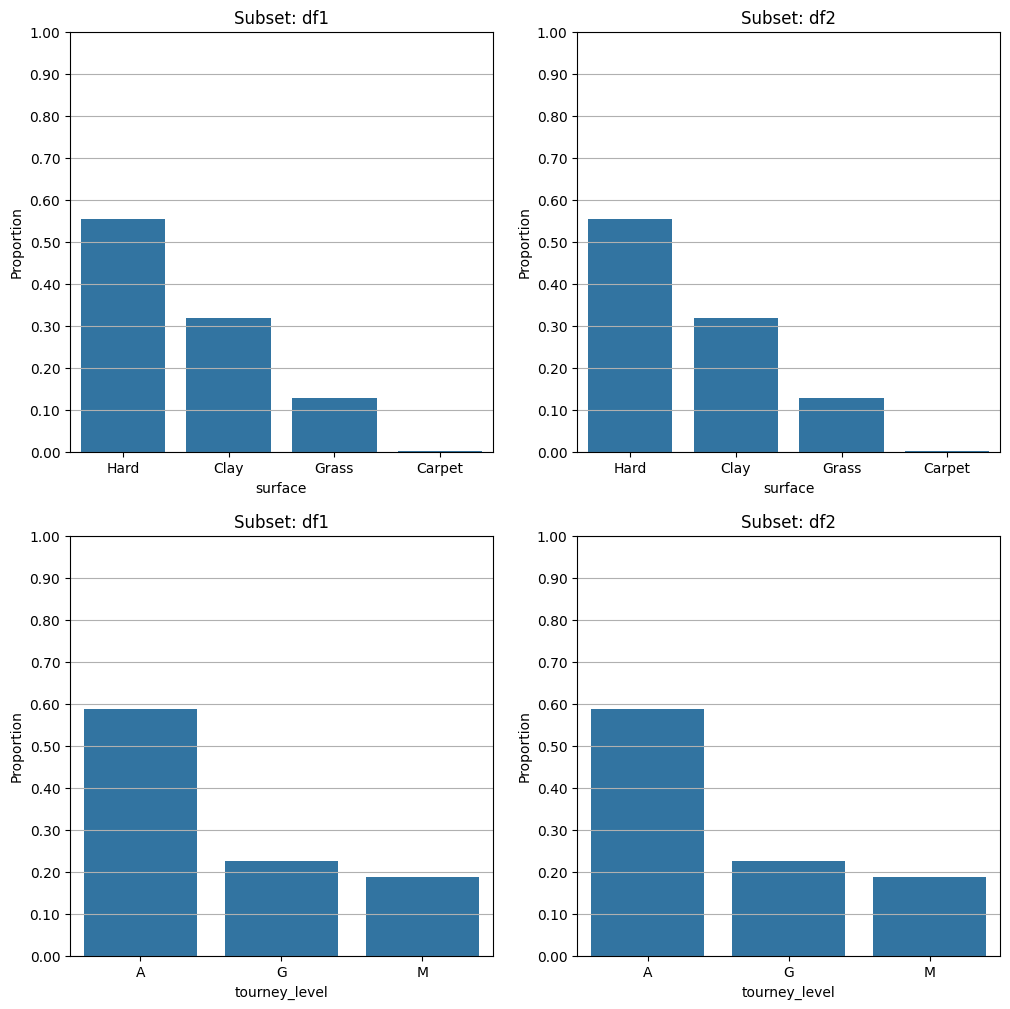

In [65]:

subset_list = [df1, df2]
column_list = ['surface', 'tourney_level']
compare_distribution(subset_list, column_list)

In [66]:

columns_drop = ['tourney_id_per', 'round', 'hth_id', 'hth_id_match', 'tourney_date', 'winner_id', 
                'loser_id', 'winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht', 
                'winner_winrate', 'loser_winrate', 'winner_winrate_10', 'loser_winrate_10', 'winner_winrate_surf', 
                'loser_winrate_surf', 'winner_winrate_level', 'loser_winrate_level', 'w_round_avg_level', 'l_round_avg_level', 'w_round_avg_tid', 'l_round_avg_tid']

In [67]:
df1['rank_diff']=df1['winner_rank']-df1['loser_rank']
df1['age_diff']=df1['winner_age']-df1['loser_age']
df1['height_diff']=df1['winner_ht']-df1['loser_ht']
df1['winrate_diff']=df1['winner_winrate']-df1['loser_winrate']
df1['winrate_diff_10']=df1['winner_winrate_10']-df1['loser_winrate_10']
df1['winrate_diff_surf']=df1['winner_winrate_surf']-df1['loser_winrate_surf']
df1['winrate_diff_level']=df1['winner_winrate_level']-df1['loser_winrate_level']
df1['round_avg_level']=df1['w_round_avg_level']-df1['l_round_avg_level']
df1['round_avg_tid']=df1['w_round_avg_tid']-df1['l_round_avg_tid']
df1['hth_rate']=df1['hth_rate']
df1['hth_rate_5']=df1['hth_rate_5']
df1['player_1_win']=1
df1.drop(columns_drop,axis=1,inplace=True)
df1.head()


,tourney_id,tourney_year,match_num,surface,tourney_level,hth_rate,hth_rate_5,rank_diff,age_diff,height_diff,winrate_diff,winrate_diff_10,winrate_diff_surf,winrate_diff_level,round_avg_level,round_avg_tid,player_1_win
0,2008-891,2008,1,Hard,A,0.0,0.0,-121.0,-1.25,2.0,0.2540,0.3,0.2091,0.2705,4.566860,3.625000,1
2,2008-891,2008,3,Hard,A,0.0,0.0,-97.0,-2.94,5.0,-0.0367,0.2,-0.1629,0.0260,0.678992,4.500000,1
4,2008-891,2008,5,Hard,A,0.0,0.0,-108.0,8.73,2.0,0.1751,0.1,0.0727,0.4086,2.021670,4.250000,1
6,2008-891,2008,7,Hard,A,0.0,0.0,-32.0,0.64,-3.0,0.0014,0.2,0.0408,0.0089,0.932382,0.480769,1
8,2008-891,2008,9,Hard,A,0.0,0.0,-42.0,1.86,-7.0,-0.0161,0.0,-0.0541,0.0800,1.138889,1.138889,1


In [68]:
df2['rank_diff']=df2['loser_rank']-df2['winner_rank']
df2['age_diff']=df2['loser_age']-df2['winner_age']
df2['height_diff']=df2['loser_ht']-df2['winner_ht']
df2['winrate_diff']=df2['loser_winrate']-df2['winner_winrate']
df2['winrate_diff_10']=df2['loser_winrate_10']-df2['winner_winrate_10']
df2['winrate_diff_surf']=df2['loser_winrate_surf']-df2['winner_winrate_surf']
df2['winrate_diff_level']=df2['loser_winrate_level']-df2['winner_winrate_level']
df2['round_avg_level']=df2['l_round_avg_level']-df2['w_round_avg_level']
df2['round_avg_tid']=df2['l_round_avg_tid']-df2['w_round_avg_tid']
df2['hth_rate']=df2['hth_rate']*(-1)
df2['hth_rate_5']=df2['hth_rate_5']*(-1)
df2['player_1_win']=0
df2.drop(columns_drop,axis=1,inplace=True)
df2.head()


,tourney_id,tourney_year,match_num,surface,tourney_level,hth_rate,hth_rate_5,rank_diff,age_diff,height_diff,winrate_diff,winrate_diff_10,winrate_diff_surf,winrate_diff_level,round_avg_level,round_avg_tid,player_1_win
1,2008-891,2008,2,Hard,A,-0.0,-0.0,-131.0,4.72,-5.0,0.0390,0.0,-0.0284,0.1833,0.388889,0.388889,0
3,2008-891,2008,4,Hard,A,-1.0,-1.0,260.0,-12.57,-5.0,-0.1701,0.3,-0.1565,-0.0105,-1.981481,-0.148148,0
5,2008-891,2008,6,Hard,A,-0.0,-0.0,23.0,2.07,5.0,-0.0688,0.2,-0.1969,0.0834,1.621849,2.257143,0
7,2008-891,2008,8,Hard,A,-1.0,-1.0,-28.0,5.23,-5.0,0.0511,0.1,0.0382,0.1266,0.559692,-1.500000,0
9,2008-891,2008,10,Hard,A,1.0,1.0,5.0,-2.80,8.0,0.0054,0.1,0.0505,-0.0698,-0.749300,-3.000000,0


In [69]:

total = pd.concat([df1, df2])
total.groupby('player_1_win').size()

player_1_win
0    22278
1    22279
dtype: int64

In [71]:

result = total.groupby('player_1_win').mean(numeric_only=True)
print(result)


              tourney_year   match_num  hth_rate  hth_rate_5  rank_diff  \
player_1_win                                                              
0              2012.789972  308.791723 -0.217614   -0.179908  98.686327   
1              2012.789712  308.773194  0.236007    0.195969 -96.007092   

              age_diff  height_diff  winrate_diff  winrate_diff_10  \
player_1_win                                                         
0            -0.212203    -0.513101     -0.045789        -0.050523   
1             0.223555     0.514849      0.044834         0.053170   

              winrate_diff_surf  winrate_diff_level  round_avg_level  \
player_1_win                                                           
0                     -0.053141           -0.049192        -0.793296   
1                      0.052465            0.048357         0.756691   

              round_avg_tid  
player_1_win                 
0                 -0.837659  
1                  0.801749  


In [72]:

total.isna().sum().sum()

np.int64(0)

In [73]:
def check_distribution(df, columns):
    row_size = 1
    column_size = len(columns)
    f_width = column_size*3
    f_height = 4
    plot_counter = 0
    fig = plt.figure(figsize = [f_width, f_height])
    gs = grd.GridSpec(2, column_size, height_ratios=[8,2], width_ratios=None, hspace=0.3, wspace=0.6)
    for column in columns:
        column_min = df[column].min()
        column_max = df[column].max()
        column_range = df[column].max() - df[column].min()
        min_x = df[column].min() - (column_range / 20)
        max_x = df[column].max() + (column_range / 20)
        ax = plt.subplot(gs[plot_counter])
        warnings.simplefilter('ignore') # ignore warning due to bug in distplot
        p = sns.distplot(df[column], kde=False, norm_hist=False)
        warnings.simplefilter('default')
        ax.xaxis.set_label_position('top') 
        if plot_counter == 0:
            plt.ylabel('Frequency')
        plt.xlim(min_x, max_x)
        ax2 = plt.subplot(gs[plot_counter + column_size])
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax2.spines['bottom'].set_visible(False)
        ax2 = sns.boxplot(x=df[column])
        plt.xlabel('age_diff')
        ax2.set(yticks=[])
        ax2.get_xaxis().set_visible(False)
        plt.xlim(min_x, max_x)
        plot_counter += 1
    plt.show()

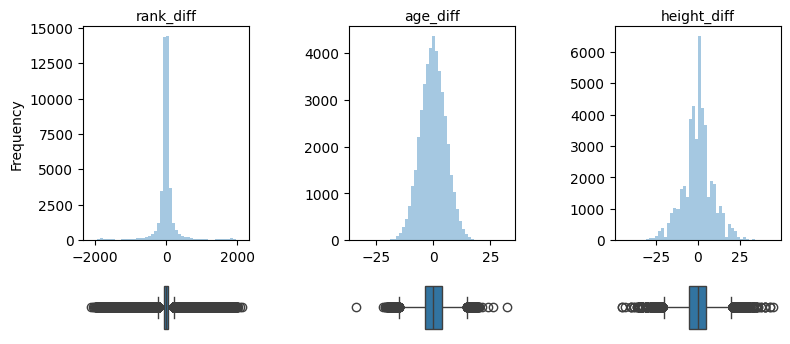

In [74]:

check_distribution(total, ['rank_diff', 'age_diff', 'height_diff'])

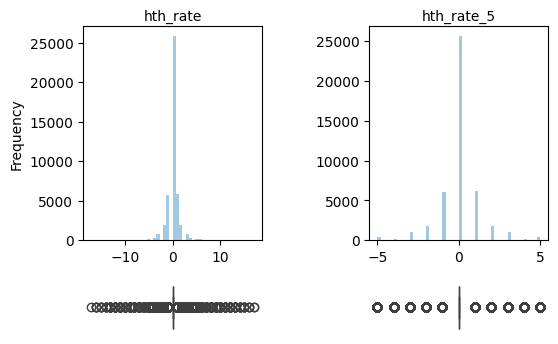

In [75]:

check_distribution(total, ['hth_rate', 'hth_rate_5'])

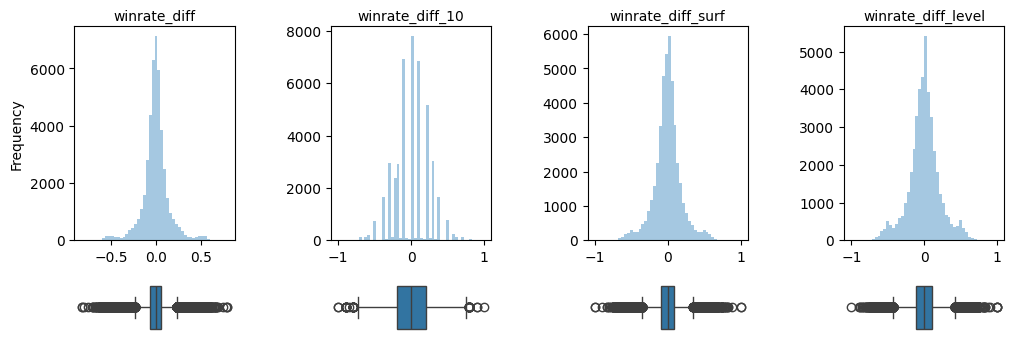

In [76]:

check_distribution(total, ['winrate_diff', 'winrate_diff_10', 'winrate_diff_surf', 'winrate_diff_level'])

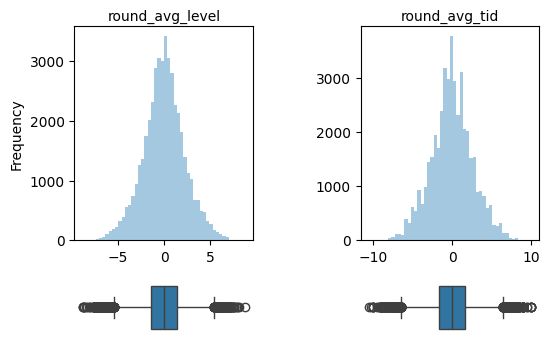

In [77]:

check_distribution(total, ['round_avg_level', 'round_avg_tid'])

In [78]:

total.head()

,tourney_id,tourney_year,match_num,surface,tourney_level,hth_rate,hth_rate_5,rank_diff,age_diff,height_diff,winrate_diff,winrate_diff_10,winrate_diff_surf,winrate_diff_level,round_avg_level,round_avg_tid,player_1_win
0,2008-891,2008,1,Hard,A,0.0,0.0,-121.0,-1.25,2.0,0.2540,0.3,0.2091,0.2705,4.566860,3.625000,1
2,2008-891,2008,3,Hard,A,0.0,0.0,-97.0,-2.94,5.0,-0.0367,0.2,-0.1629,0.0260,0.678992,4.500000,1
4,2008-891,2008,5,Hard,A,0.0,0.0,-108.0,8.73,2.0,0.1751,0.1,0.0727,0.4086,2.021670,4.250000,1
6,2008-891,2008,7,Hard,A,0.0,0.0,-32.0,0.64,-3.0,0.0014,0.2,0.0408,0.0089,0.932382,0.480769,1
8,2008-891,2008,9,Hard,A,0.0,0.0,-42.0,1.86,-7.0,-0.0161,0.0,-0.0541,0.0800,1.138889,1.138889,1


In [79]:
scaler=MinMaxScaler(feature_range=(0,1))
numerical=['hth_rate','hth_rate_5','rank_diff','age_diff','height_diff','winrate_diff','winrate_diff_10','winrate_diff_surf','winrate_diff_level','round_avg_level','round_avg_tid']
total_norm=pd.DataFrame(data=total)
total_norm[numerical]=scaler.fit_transform(total[numerical])
display(total_norm.head(n=5))


,tourney_id,tourney_year,match_num,surface,tourney_level,hth_rate,hth_rate_5,rank_diff,age_diff,height_diff,winrate_diff,winrate_diff_10,winrate_diff_surf,winrate_diff_level,round_avg_level,round_avg_tid,player_1_win
0,2008-891,2008,1,Hard,A,0.5,0.5,0.471654,0.488291,0.522222,0.664475,0.65,0.60455,0.63525,0.761026,0.689865,1
2,2008-891,2008,3,Hard,A,0.5,0.5,0.477299,0.462591,0.555556,0.485835,0.60,0.41855,0.51300,0.540120,0.732432,1
4,2008-891,2008,5,Hard,A,0.5,0.5,0.474712,0.640055,0.522222,0.615990,0.55,0.53635,0.70430,0.616410,0.720270,1
6,2008-891,2008,7,Hard,A,0.5,0.5,0.492590,0.517032,0.466667,0.509248,0.60,0.52040,0.50445,0.554517,0.536902,1
8,2008-891,2008,9,Hard,A,0.5,0.5,0.490238,0.535584,0.422222,0.498494,0.50,0.47295,0.54000,0.566251,0.568919,1


In [80]:

total_norm.describe()

,tourney_year,match_num,hth_rate,hth_rate_5,rank_diff,age_diff,height_diff,winrate_diff,winrate_diff_10,winrate_diff_surf,winrate_diff_level,round_avg_level,round_avg_tid,player_1_win
count,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000,44557.000000
mean,2012.789842,308.782458,0.500271,0.500803,0.500432,0.507386,0.500010,0.508095,0.500662,0.499832,0.499792,0.500501,0.512641,0.500011
std,3.099055,310.697241,0.046798,0.124853,0.085383,0.084323,0.098920,0.088687,0.117038,0.093821,0.106589,0.126825,0.127286,0.500006
min,2008.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,23.000000,0.500000,0.500000,0.487415,0.451034,0.444444,0.472009,0.400000,0.456100,0.446400,0.423542,0.434054,0.000000
50%,2013.000000,220.000000,0.500000,0.500000,0.500353,0.507299,0.500000,0.508204,0.500000,0.500000,0.500000,0.501540,0.513514,1.000000
75%,2015.000000,708.000000,0.500000,0.500000,0.513291,0.564173,0.555556,0.543969,0.600000,0.544100,0.553150,0.578122,0.589740,1.000000
max,2018.000000,946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:

total_final = pd.get_dummies(total_norm, columns=['surface', 'tourney_level'], dummy_na=False, prefix_sep='_')
total_final.head()

,tourney_id,tourney_year,match_num,hth_rate,hth_rate_5,rank_diff,age_diff,height_diff,winrate_diff,winrate_diff_10,winrate_diff_surf,winrate_diff_level,round_avg_level,round_avg_tid,player_1_win,surface_Carpet,surface_Clay,surface_Grass,surface_Hard,tourney_level_A,tourney_level_G,tourney_level_M
0,2008-891,2008,1,0.5,0.5,0.471654,0.488291,0.522222,0.664475,0.65,0.60455,0.63525,0.761026,0.689865,1,False,False,False,True,True,False,False
2,2008-891,2008,3,0.5,0.5,0.477299,0.462591,0.555556,0.485835,0.60,0.41855,0.51300,0.540120,0.732432,1,False,False,False,True,True,False,False
4,2008-891,2008,5,0.5,0.5,0.474712,0.640055,0.522222,0.615990,0.55,0.53635,0.70430,0.616410,0.720270,1,False,False,False,True,True,False,False
6,2008-891,2008,7,0.5,0.5,0.492590,0.517032,0.466667,0.509248,0.60,0.52040,0.50445,0.554517,0.536902,1,False,False,False,True,True,False,False
8,2008-891,2008,9,0.5,0.5,0.490238,0.535584,0.422222,0.498494,0.50,0.47295,0.54000,0.566251,0.568919,1,False,False,False,True,True,False,False


In [82]:

all_matches = len(atp_2018_df)
correct_matches = len(atp_2018_df[atp_2018_df['winner_rank'] < atp_2018_df['loser_rank']])
benchmark_accuracy = round(100 * correct_matches / all_matches, 1)
print('Benchmark prediction: {} of {} correct - {}%'.format(correct_matches, all_matches, benchmark_accuracy))

Benchmark prediction: 1101 of 1758 correct - 62.6%


In [83]:

ftp_all = tdc_2018_raw_df[tdc_2018_raw_df['countable_pick'] == 1].countable_pick.sum() # type: ignore
ftp_correct = tdc_2018_raw_df[tdc_2018_raw_df['countable_pick'] == 1].correct_pick.sum() # type: ignore
ftp_accuracy = round(100 * ftp_correct / ftp_all, 1)
print('Best fantasy tennis player prediction: {} of {} correct - {}%'.format(ftp_correct, ftp_all, ftp_accuracy))

Best fantasy tennis player prediction: 1168 of 1758 correct - 66.4%


In [84]:
challenge=total_final[total_final['tourney_year']==2018].copy()
challenge=pd.merge(challenge,tdc_2018_df,how='inner',on=['tourney_id','match_num'])
challenge=challenge.sample(frac=1.0,random_state=42).reset_index(drop=True)
y_challenge=challenge['player_1_win']
X_challenge=challenge.drop(['player_1_win','tourney_id','match_num','tourney_year'],axis=1)
print('Shape of X_challenge: {}'.format(X_challenge.shape))
print('Shape of y_challenge: {}'.format(y_challenge.shape))
challenge.groupby('tourney_year').size().to_frame()


Shape of X_challenge: (1758, 18)
Shape of y_challenge: (1758,)


,0
tourney_year,
2018,1758


In [85]:

print("Challenge set has an average of {} for y.".format(round(y_challenge.mean(), 4)))

Challenge set has an average of 0.4994 for y.


In [86]:
train_test=total_final[total_final['tourney_year']<2018].copy()
train_test=train_test.sample(frac=1.0,random_state=42).reset_index(drop=True)
y=train_test['player_1_win']
X=train_test.drop(['player_1_win','tourney_id','match_num','tourney_year'],axis=1)
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
train_test.groupby('tourney_year').size().to_frame()


Shape of X: (40623, 18)
Shape of y: (40623,)


,0
tourney_year,
2008,4167
2009,4326
2010,4316
2011,4259
2012,4269
2013,4304
2014,4228
2015,4268
2016,3868


In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 32498 samples.
Testing set has 8125 samples.


In [88]:

print("Training set has an average of {} for y.".format(round(y_train.mean(), 4)))
print("Testing set has an average of {} for y.".format(round(y_test.mean(), 4)))

Training set has an average of 0.4985 for y.
Testing set has an average of 0.5062 for y.


In [89]:
def train_predict(learner,X_train,y_train,X_test,y_test):
    results={}
    start=time()
    learner=learner.fit(X_train,y_train)
    results['train_time']=round(time()-start,4)
    start=time()
    predictions_test=learner.predict(X_test)
    predictions_train=learner.predict(X_train)
    results['pred_time']=round(time()-start,4)
    results['acc_train']=round(accuracy_score(y_train,predictions_train),4)
    results['acc_test']=round(accuracy_score(y_test,predictions_test),4)
    return results


In [90]:
LR_model=LogisticRegression(solver='lbfgs',random_state=42,max_iter=200)
results={}
for column in X_train.columns:
    results[column]=train_predict(LR_model,X_train[column].values.reshape(-1,1),y_train,X_test[column].values.reshape(-1,1),y_test)
results_df=pd.DataFrame(results)
results_df.T.sort_values('acc_test',ascending=[False])


,train_time,pred_time,acc_train,acc_test
rank_diff,0.0439,0.0080,0.6723,0.6642
round_avg_level,0.0428,0.0000,0.6547,0.6431
winrate_diff,0.0397,0.0000,0.6403,0.6326
round_avg_tid,0.0416,0.0000,0.6408,0.6309
winrate_diff_surf,0.0499,0.0000,0.6319,0.6270
winrate_diff_level,0.0427,0.0000,0.6064,0.6144
winrate_diff_10,0.0327,0.0000,0.5927,0.5927
hth_rate_5,0.0320,0.0000,0.5454,0.5457
hth_rate,0.0562,0.0000,0.5454,0.5455
height_diff,0.0240,0.0000,0.5146,0.5154


In [91]:

best_features = ['rank_diff', 'round_avg_level', 'round_avg_tid', 'winrate_diff', 'winrate_diff_surf', 'winrate_diff_level', 'winrate_diff_10', 'height_diff', 'hth_rate_5', 'hth_rate', 'age_diff']

In [92]:
clf_LR=LogisticRegression(solver='lbfgs',random_state=42,max_iter=200)
clf_GNB=GaussianNB()
clf_RF=RandomForestClassifier(n_estimators=10,random_state=42)
clf_XGB=xgb.XGBClassifier(objective='reg:logistic',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10,random_state=42)
results={}
for clf in [clf_LR,clf_GNB,clf_RF,clf_XGB]:
    results[clf.__class__.__name__]=train_predict(clf,X_train,y_train,X_test,y_test)
results_df=pd.DataFrame(results)
results_df


,LogisticRegression,GaussianNB,RandomForestClassifier,XGBClassifier
train_time,0.2677,0.0481,2.1472,0.0938
pred_time,0.0228,0.0474,0.1062,0.0075
acc_train,0.6861,0.6714,0.9858,0.7106
acc_test,0.6729,0.6618,0.6751,0.6923


In [93]:
clf_LR_SF=LogisticRegression(solver='lbfgs',random_state=42,max_iter=200)
clf_GNB_SF=GaussianNB()
clf_RF_SF=RandomForestClassifier(n_estimators=10,random_state=42)
clf_XGB_SF=xgb.XGBClassifier(objective='reg:logistic',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10)
results={}
for clf in [clf_LR_SF,clf_GNB_SF,clf_RF_SF,clf_XGB_SF]:
    results[clf.__class__.__name__]=train_predict(clf,X_train[best_features],y_train,X_test[best_features],y_test)
results_df=pd.DataFrame(results)
results_df


,LogisticRegression,GaussianNB,RandomForestClassifier,XGBClassifier
train_time,0.0932,0.0246,2.2376,0.0528
pred_time,0.0123,0.0312,0.0942,0.0080
acc_train,0.6861,0.6707,0.9854,0.7097
acc_test,0.6734,0.6613,0.6724,0.6898


In [95]:
start = time() 
RF_clf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
parameters = {'n_estimators': [16, 18, 20], 
              'max_depth': [10, 12, 14], 
              'min_samples_leaf': [2, 4, 6], 
              'min_samples_split': [14, 16, 18]}
scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(RF_clf, parameters, cv=5, scoring=scorer, verbose=4, n_jobs=-1)
grid_fit = grid_obj.fit(X_train, y_train)
best_RF_clf = grid_fit.best_estimator_
predictions = (RF_clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_RF_clf.predict(X_test)
time_minutes = round((time()-start)/60, 1)
print("Unoptimized model: Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Optimized Model: Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print('Tuning took: {} minutes'.format(time_minutes))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Unoptimized model: Accuracy score on testing data: 0.6751
Optimized Model: Final accuracy score on the testing data: 0.6940
Tuning took: 1.7 minutes


In [96]:
best_RF_clf

RandomForestClassifier(max_depth=12, min_samples_leaf=2, min_samples_split=14,
                       n_estimators=20, n_jobs=-1, random_state=42)

In [97]:
start=time()
XGB_clf=xgb.XGBClassifier(objective='reg:logistic',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimators=10,n_jobs=-1,random_state=42)
parameters={'learning_rate':[0.7,0.75,0.8],'max_depth':[5,6,7],'n_estimators':[11,12,13],'subsample':[0.9,0.95,1],'colsample_bytree':[0.70,0.75,0.80],'alpha':[1,2,3]}
scorer=make_scorer(accuracy_score)
grid_obj=GridSearchCV(XGB_clf,parameters,cv=5,scoring=scorer,verbose=4,n_jobs=-1)
grid_fit=grid_obj.fit(X_train,y_train)
best_XGB_clf=grid_fit.best_estimator_
predictions=(XGB_clf.fit(X_train,y_train)).predict(X_test)
best_predictions=best_XGB_clf.predict(X_test)
time_minutes=round((time()-start)/60,1)
print("Unoptimized model: Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test,predictions)))
print("Optimized Model: Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test,best_predictions)))
print('Tuning took: {} minutes'.format(time_minutes))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Unoptimized model: Accuracy score on testing data: 0.6923
Optimized Model: Final accuracy score on the testing data: 0.7378
Tuning took: 2.6 minutes


In [98]:

best_XGB_clf

XGBClassifier(alpha=2, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.7, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=13,
              n_jobs=-1, ...)

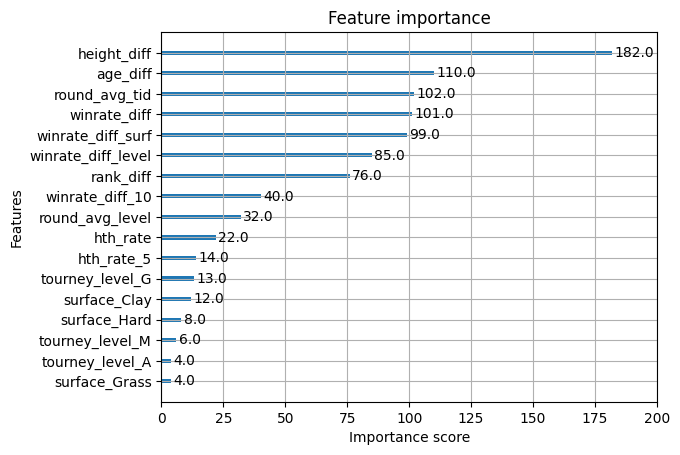

In [99]:

ax = xgb.plot_importance(best_XGB_clf)

In [100]:
def predict_challenge(learner,X_challenge,y_challenge):
    results={}
    results['predictions']=learner.predict(X_challenge)
    results['acc_challenge']=round(accuracy_score(y_challenge,results['predictions']),4)
    return results


In [101]:

results = {}
for clf in [clf_LR, clf_GNB, best_RF_clf, best_XGB_clf]:
    clf_name = clf.__class__.__name__
    results[clf_name] = predict_challenge(clf, X_challenge, y_challenge)
results_df = pd.DataFrame(results).T
results_df['acc_challenge'].to_frame().sort_values(['acc_challenge'], ascending=[False])

,acc_challenge
XGBClassifier,0.8146
RandomForestClassifier,0.6758
LogisticRegression,0.6382
GaussianNB,0.6149


In [102]:

challenge_pred_df = pd.DataFrame()
challenge_pred_df['Actual'] = y_challenge
challenge_pred_df['Predicted'] = results_df['predictions']['XGBClassifier']
challenge_pred_df['Correct'] = np.where(challenge_pred_df['Actual'] == challenge_pred_df['Predicted'], 1, 0)
all_model = len(challenge_pred_df)
correct_model = challenge_pred_df['Correct'].sum()
model_accuracy = round(100 * correct_model / all_model, 1)
print('Model prediction: {} of {} correct - {}%'.format(correct_model, all_model, model_accuracy))

Model prediction: 1432 of 1758 correct - 81.5%


In [103]:

data = {'classifier': ['Machine Learning Model', 'Best Fantasy Tennis Player', 'Benchmark'], 
        'accuracy': [model_accuracy, ftp_accuracy, benchmark_accuracy]}
pred_df = pd.DataFrame(data)
pred_df

,classifier,accuracy
0,Machine Learning Model,81.5
1,Best Fantasy Tennis Player,66.4
2,Benchmark,62.6


C:\Users\Admin\AppData\Local\Temp\ipykernel_17668\816075642.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='accuracy', y='classifier', data=pred_df, palette=colors)


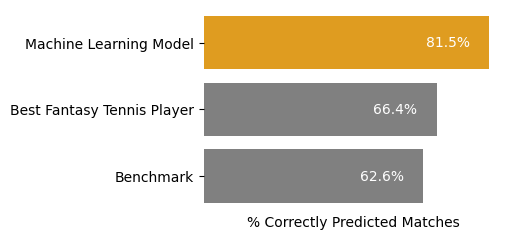

In [104]:

colors = ['grey' if (x < max(pred_df['accuracy'])) else 'orange' for x in pred_df['accuracy']]
plt.figure(figsize=(3, 2))
ax = plt.axes([0, 0, 1, 1], frameon=False)
ax = sns.barplot(x='accuracy', y='classifier', data=pred_df, palette=colors)
ax.set(xlabel='% Correctly Predicted Matches', ylabel='')
ax.get_xaxis().set_ticks([])
for index, row in pred_df.iterrows():
    pct_string = f"{row['accuracy']}%"
    ax.text(row['accuracy'] - 18, index, pct_string, va='center', color='white', weight='normal')


In [105]:
df.to_csv('output.csv', index=False)